
___
# Recommender Systems with Python

Welcome to the code notebook for Recommender Systems with Python. In this lecture we will develop basic recommendation systems using Python and pandas.

In this notebook, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.

There is no project for this topic, instead you have the option to work through the advanced lecture version of this notebook (totally optional!).

Let's get started!

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timesamp']
user_data = pd.read_csv('u.data', sep='\t', names=column_names)

item_ids = user_data['item_id'].unique()
items_ids = {item_ids[i] : i for i in range(0, len(item_ids))}
new_ids = [items_ids[i] for i in user_data['item_id'].values]

user_data['item_id'] = new_ids

In [3]:
df = pd.read_excel('datadotgov_main.xlsx')

## Get the Data

In [4]:
df.head()

,ABN,Charity_Legal_Name,Other_Organisation_Names,Address_Type,Address_Line_1,Address_Line_2,Address_Line_3,Town_City,State,Postcode,...,People_at_risk_of_homelessness,People_with_Chronic_Illness,People_with_Disabilities,Pre_Post_Release_Offenders,Rural_Regional_Remote_Communities,Unemployed_Person,Veterans_or_their_families,Victims_of_crime,Victims_of_Disasters,Youth
0,11000047950,Sydney Missionary & Bible College,NaN,Business,43 Badminton Rd,NaN,NaN,Croydon,New South Wales,2132.0,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN
1,11000073870,Integricare,NaN,Business,"Suite 8, Level 1,",1-17 Elsie Street,NaN,Burwood,New South Wales,2134.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11000761571,Australian Missionary Tidings,NaN,Business,35 Miriam St,NaN,NaN,Holland Park West,Queensland,4121.0,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,Y,NaN
3,11001233790,"The Greek Orthodox Church & Community Of The ""...",NaN,Business,11 Steel Street,NaN,NaN,HAMILTON,NSW,2303.0,...,Y,NaN,Y,NaN,Y,NaN,NaN,NaN,Y,Y
4,11001241005,Wangarang Industries Limited,NaN,Business,1635 Forest Rd,NaN,NaN,Orange,New South Wales,2800.0,...,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
columns = ['Charity_Legal_Name', 
           'Country', 
           'Charity_Size', 
           'Operates_in_ACT', 
           'Operates_in_NSW', 
           'Operates_in_NT', 
           'Operates_in_QLD', 
           'Operates_in_SA']

### Making th table that has features to work with and assigning random followers ###

In [5]:
features_table = df[columns]

In [6]:
features_table['Charity_Size'] = [0 if size == 'Small' else 2 if size == 'Medium' else 1 for size in features_table['Charity_Size']]

<ipython-input-6-220cc4b90350>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_table['Charity_Size'] = [0 if size == 'Small' else 2 if size == 'Medium' else 1 for size in features_table['Charity_Size']]


In [7]:
table_data = pd.merge(user_data, features_table, left_on='item_id', right_index=True)
table_data.sort_values(by='Charity_Size', ascending=False).head()

,user_id,item_id,rating,timesamp,Charity_Legal_Name,Country,Charity_Size,Operates_in_ACT,Operates_in_NSW,Operates_in_NT,Operates_in_QLD,Operates_in_SA
95414,342,136,5,874984661,Change Futures Ltd,Australia,2,NaN,Y,NaN,Y,NaN
18405,450,492,5,882394364,Scarborough Baptist Church Inc,Australia,2,NaN,NaN,NaN,NaN,NaN
9025,56,492,3,892678669,Scarborough Baptist Church Inc,Australia,2,NaN,NaN,NaN,NaN,NaN
10150,291,492,5,874868255,Scarborough Baptist Church Inc,Australia,2,NaN,NaN,NaN,NaN,NaN
11012,378,492,2,880055336,Scarborough Baptist Church Inc,Australia,2,NaN,NaN,NaN,NaN,NaN


Let's create a ratings dataframe with average rating and number of ratings:

In [8]:
table_data.groupby('Charity_Legal_Name')['rating'].mean().sort_values(ascending=False).head()

Charity_Legal_Name
Centennial Parklands Foundation Limited                           5.0
St Johns Lutheran Primary School Portland                         5.0
Society of Environmental Toxicology and Chemistry Asia-Pacific    5.0
Legend Park Pre School Assoc Inc                                  5.0
Sydney Chinese School Trust                                       5.0
Name: rating, dtype: float64

In [9]:
table_data.groupby('Charity_Legal_Name')['rating'].count().sort_values(ascending=False).head()

Charity_Legal_Name
The Corporation Of The Synod Of The Diocese Of Brisbane    607
Sydney Missionary & Bible College                          584
Taiwan Film Festival Incorporated                          509
Hunter Valley Brumby Association                           508
Imam Husain Limited                                        507
Name: rating, dtype: int64

In [10]:
ratings = pd.DataFrame(table_data.groupby('Charity_Legal_Name')['rating'].mean())
ratings.head()

,rating
Charity_Legal_Name,
"""Lucky Stars Australia"" Transplant Cricket Inc.",2.754717
24/7 Community Inc,3.769231
2Lm Childrens Christmas Appeal,3.215017
A Chance For Change Ltd,2.750000
A Taste Of Paradise Organic Farm Limited,2.652174


In [11]:
ratings['num of ratings'] = pd.DataFrame(table_data.groupby('Charity_Legal_Name')['rating'].count())
ratings.head()

,rating,num of ratings
Charity_Legal_Name,,
"""Lucky Stars Australia"" Transplant Cricket Inc.",2.754717,53
24/7 Community Inc,3.769231,91
2Lm Childrens Christmas Appeal,3.215017,293
A Chance For Change Ltd,2.750000,4
A Taste Of Paradise Organic Farm Limited,2.652174,46


<AxesSubplot:>

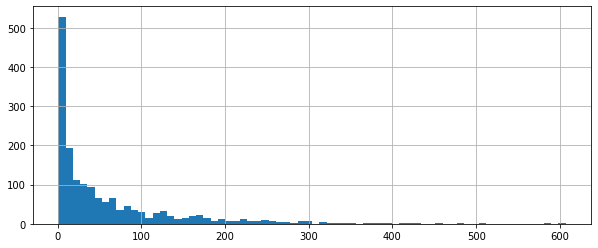

In [19]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(basdins=70)

<AxesSubplot:>

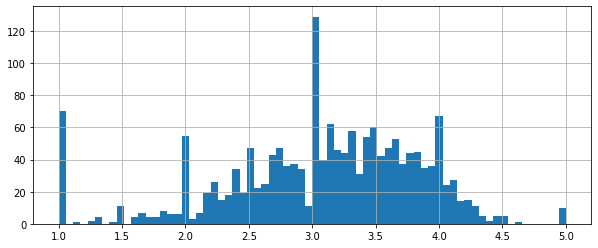

In [14]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

## Recommending Similar charities

Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [28]:
charitiesmat = table_data.pivot_table(index=table_data.index,columns='Charity_Legal_Name',values='rating')
charitiesmat = charitiesmat.dropna(thresh=20, axis=1).fillna(0)
charitiesmat.head()

Charity_Legal_Name,"""Lucky Stars Australia"" Transplant Cricket Inc.",24/7 Community Inc,2Lm Childrens Christmas Appeal,A Taste Of Paradise Organic Farm Limited,A&A Ministry Partners Limited,ACPT - Belmore with McCallums Hill & Clemton Park,ADEA Diabetes Research Foundation,ASIT (WA) Ltd.,ATHOC Foundation,AUS Education Foundation Limited,...,Yagoona Baptist Church,Yanchep community men's shed Inc,Yandeyarra Pastoral Aboriginal Corporation,Ychalal Foundation,Yenda Preschool Kindergarten Inc,Yerong Creek Parents And Citizens Association,Yesodei Hatorah Yeshiva Inc.,Young District Anglican Ministry,Youth Advocacy Centre Inc,yourtown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
avg_rating = table_data['rating'].mean()
avg_rating

3.5298641040768777

In [33]:
item_similarity = charitiesmat.corr(method='pearson')

In [34]:
def get_similar(movie_name,rating):
    similar_score = item_similarity[movie_name]*(rating-avg_rating)
    similar_score = similar_score.sort_values(ascending=False)
    #print(type(similar_ratings))
    return similar_score

In [40]:
action_lover = [('"Lucky Stars Australia" Transplant Cricket Inc.',4),('Aboriginal & Torres Strait Islander Legal Service (Qld) Ltd',3)]
similar_scores = pd.DataFrame()
for movie,rating in action_lover:
    similar_scores = similar_scores.append(get_similar(movie,rating),ignore_index = True)

recommended_movies = similar_scores.sum().sort_values(ascending=False)
similar_scores.sum().sort_values(ascending=False).head(10)

"Lucky Stars Australia" Transplant Cricket Inc.            0.470728
The Corporation Of The Synod Of The Diocese Of Brisbane    0.001306
Sydney Missionary & Bible College                          0.001306
Hunter Valley Brumby Association                           0.001209
Imam Husain Limited                                        0.001209
Taiwan Film Festival Incorporated                          0.001203
The Korean Buddhist Kwan Um Sa Incorporated                0.001151
Anglican Parish of Bull Creek - Leeming                    0.001146
Doxa Community Club Incorporated                           0.001146
Yagoona Baptist Church                                     0.001139
dtype: float64

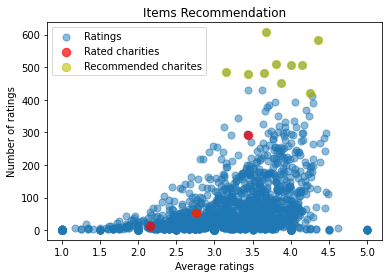

In [48]:
ratings = pd.DataFrame(table_data.groupby('Charity_Legal_Name')['rating'].mean())
ratings['num of ratings'] = table_data.groupby('Charity_Legal_Name')['Charity_Legal_Name'].count()

fig, ax = plt.subplots()

line1 = ax.scatter(ratings['rating'].values, ratings['num of ratings'].values, s=50, alpha=.5)
ax.set_xlabel('Average ratings')
ax.set_ylabel('Number of ratings')

record = ratings.loc[['Aboriginal & Torres Strait Islander Legal Service (Qld) Ltd', '"Lucky Stars Australia" Transplant Cricket Inc.', 'ABC Friends National Inc.']]
recommended = ratings.loc[list(recommended_movies.index)[:11]]

for i in recommended.values:
    line3=ax.scatter(i[0], i[1], s=70, c='y', alpha=.6)
for i in record.values:
    line2=ax.scatter(i[0], i[1], s=70, c='r', alpha=.7)
ax.legend([line1, line2, line3], ['Ratings', 'Rated charities', 'Recommended charites'])
ax.set_title("Items Recommendation")

def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [25]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
Charity_Legal_Name,,
The Corporation Of The Synod Of The Diocese Of Brisbane,3.677100,607
Sydney Missionary & Bible College,4.359589,584
Taiwan Film Festival Incorporated,3.803536,509
Hunter Valley Brumby Association,4.155512,508
Imam Husain Limited,4.007890,507
Doxa Community Club Incorporated,3.156701,485
The Korean Buddhist Kwan Um Sa Incorporated,3.656965,481
Anglican Parish of Bull Creek - Leeming,3.441423,478
Yagoona Baptist Church,3.878319,452


Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.

Now let's grab the user ratings for those two movies:

In [28]:
user_ratings = moviemat['The Corporation Of The Synod Of The Diocese Of Brisbane']

We can then use corrwith() method to get correlations between two pandas series:

In [29]:
similar_to_charity = moviemat.corrwith(user_ratings)

Let's clean this by removing NaN values and using a DataFrame instead of a series:

In [30]:
corr_dolphin = pd.DataFrame(similar_to_charity,columns=['Correlation'])
corr_dolphin.dropna(inplace=True)
corr_dolphin.head()

,Correlation
Charity_Legal_Name,
"""Lucky Stars Australia"" Transplant Cricket Inc.",-0.001618
24/7 Community Inc,-0.002205
2Lm Childrens Christmas Appeal,-0.003851
A Taste Of Paradise Organic Farm Limited,-0.001461
A&A Ministry Partners Limited,-0.001188


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie). 

In [31]:
corr_dolphin.sort_values('Correlation',ascending=False).head(10)

,Correlation
Charity_Legal_Name,
The Corporation Of The Synod Of The Diocese Of Brisbane,1.000000
AUSTRALIAN BRAGG CENTRE FOR PROTON THERAPY AND RESEARCH LIMITED,-0.000647
Al Sadiq College Ltd,-0.000647
Tamil Educational Cultural & Charitable Association,-0.000652
Centre for Academic Research and Education Limited,-0.000658
St Gabriels School For Hearing Impaired Children,-0.000676
Victorian Brumby Association Inc,-0.000677
Chapman Valley Historical Society (Inc),-0.000677
Catholic Parish St Canice Elizabeth Bay,-0.000681


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [165]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


Now sort the values and notice how the titles make a lot more sense:

In [157]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


Now the same for the comedy Liar Liar:

In [158]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


,ABN,Charity_Legal_Name,Other_Organisation_Names,Address_Type,Address_Line_1,Address_Line_2,Address_Line_3,Town_City,State,Postcode,...,People_at_risk_of_homelessness,People_with_Chronic_Illness,People_with_Disabilities,Pre_Post_Release_Offenders,Rural_Regional_Remote_Communities,Unemployed_Person,Veterans_or_their_families,Victims_of_crime,Victims_of_Disasters,Youth
0,11000047950,Sydney Missionary & Bible College,NaN,Business,43 Badminton Rd,NaN,NaN,Croydon,New South Wales,2132.0,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN
1,11000073870,Integricare,NaN,Business,"Suite 8, Level 1,",1-17 Elsie Street,NaN,Burwood,New South Wales,2134.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11000761571,Australian Missionary Tidings,NaN,Business,35 Miriam St,NaN,NaN,Holland Park West,Queensland,4121.0,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,Y,NaN
3,11001233790,"The Greek Orthodox Church & Community Of The ""...",NaN,Business,11 Steel Street,NaN,NaN,HAMILTON,NSW,2303.0,...,Y,NaN,Y,NaN,Y,NaN,NaN,NaN,Y,Y
4,11001241005,Wangarang Industries Limited,NaN,Business,1635 Forest Rd,NaN,NaN,Orange,New South Wales,2800.0,...,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
